# Tensorflow: Basics reference guide

* Basics
* Tensorflow Graphs basics
* Tensorflow Neural Network: Linear regression and classification
* Estimators for classification
* DNN: Dense Neural Network classifier

In [2]:
import tensorflow as tf

## Basics

In [2]:
print(tf.__version__)

1.13.1


In [4]:
hello = tf.constant('Hello')

world = tf.constant('world')

with tf.Session() as sess:
    result = sess.run(hello+world)

In [5]:
print(result)

b'Helloworld'


In [6]:
a = tf.constant(10)
b = tf.constant(20)

a+b

<tf.Tensor 'add_1:0' shape=() dtype=int32>

#### tensor: n dimension array

In [7]:
fill_mat = tf.fill((4,4),10)

myzeros = tf.zeros((4,4))

myones = tf.ones((4,4))

In [8]:
fill_mat

<tf.Tensor 'Fill:0' shape=(4, 4) dtype=int32>

In [11]:
myrandn = tf.random_normal((4,4),mean =0, stddev = 1.0)
myrandu = tf.random_uniform((4,4),minval=0, maxval= 1)

#### calling functions

In [15]:
my_ops = [fill_mat ,myzeros,myrandn]


In [17]:
with tf.Session() as sess:
    result = sess.run(my_ops)
    
print(result)

[array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32), array([[ 1.2123208 ,  0.251575  , -0.8132166 ,  0.01667964],
       [-0.03499965, -0.43506962,  0.04367896, -0.27108732],
       [ 0.2583481 ,  0.08379919,  1.0234421 ,  0.7952701 ],
       [-0.17960583, -2.075164  ,  1.2611476 , -0.60460997]],
      dtype=float32)]


In [19]:
sess = tf.InteractiveSession()

for op in my_ops:
    print(sess.run(op))

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.25833115  1.1507314  -0.20245618 -0.4790845 ]
 [ 1.7524781   1.1750531  -0.39403075 -1.0919354 ]
 [-1.4960189   0.42575884 -0.42641738 -1.0700595 ]
 [-1.8894049  -0.33005577  0.17525688  0.6950883 ]]


#### metric multiplication

In [22]:
a = tf.constant([[1,2],
                [3,4]])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [23]:
b = tf.constant([[10],
                [100]])

result_mut = tf.matmul(a,b)

with tf.Session() as sess:
    result = sess.run(result_mut)

In [24]:
print(result)

[[210]
 [430]]


## Tensorflow Graphs

* Graphs are sets  of connected nodes
* The connections are referred to as edges
* In tensorflow each node is an operation with possible inputs that can supply some output

#### Simple graph

In [25]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2

with tf.Session() as sess:
    result = sess.run(n3)

print (result)

3


#### Select default graph

In [27]:
graph = tf.get_default_graph()
print(graph)

In [29]:
with graph.as_default():
    print(graph is tf.get_default_graph())

True


#### Variables

In [45]:
sess = tf.InteractiveSession()

##### 1. Creating variable

In [46]:
my_tensor = tf.random_uniform((4,4),0,1)

my_var = tf.Variable(initial_value =my_tensor)

##### 2. Initializing variable

In [47]:
init = tf.global_variables_initializer()

sess.run(init)

##### 3. Running in the session

In [44]:
sess.run(my_var)

array([[0.00186956, 0.34383118, 0.2851411 , 0.00660014],
       [0.8049712 , 0.94822514, 0.71914566, 0.6932373 ],
       [0.606104  , 0.03423214, 0.16893184, 0.21782804],
       [0.65050614, 0.32439995, 0.08262134, 0.04039884]], dtype=float32)

##### Placeholder

A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, with
out needing the data.

In [37]:
ph = tf.placeholder(tf.float32)

## Tensorflow Neural Network

### Example 1

In [75]:
import numpy as np
import tensorflow as tf

In [56]:
np.random.seed(101)
tf.set_random_seed(101)

In [57]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [58]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

#### Placeholders

In [59]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

#### Operations

In [60]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)

#### Running Sessions  to create Graphs with Feed Dictionaries

In [61]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


### Example 2: creating activation function

In [62]:
n_features = 10
n_dense_neurons = 3

In [63]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [64]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

#### Operation Activation Function 

In [65]:
xW = tf.matmul(x,W)

In [66]:
z = tf.add(xW,b)

In [67]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

#### Variable Intializer

In [68]:
init = tf.global_variables_initializer()

In [69]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [70]:
print(layer_out)

[[0.7159624  0.08162021 0.15817577]]


### Example 3: Regression example

#### Data

In [71]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [72]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [73]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

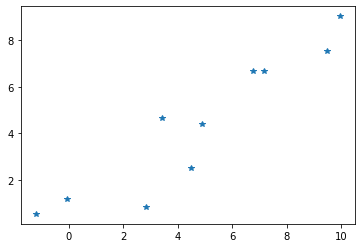

In [76]:
from matplotlib import pyplot as plt
plt.plot(x_data,y_label,'*')

#### Variables

In [78]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [79]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

#### Cost Function

In [80]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


#### Optimizer

In [81]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

#### Initialize Variables

In [82]:
init = tf.global_variables_initializer()

#### Create Session

In [83]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [84]:
final_slope

0.79804665

In [85]:
final_intercept

0.5121294

#### Evaluate Results

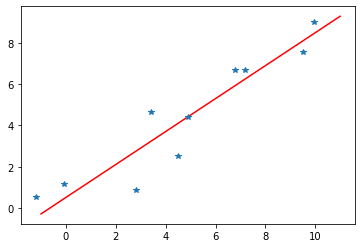

In [86]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

### Example 3: Regression example - large dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Sampayo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sampayo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sampayo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sampayo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

#### Data

In [14]:
X = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(X))

y = mx + b

b = 5

In [15]:
y_true = (0.5*X) + 5 + noise

In [51]:
x_df = pd.DataFrame(data = X, columns = ['X'])
y_df = pd.DataFrame(data = y_true, columns = ['Y'])
df = pd.concat([x_df,y_df], axis = 1)

In [52]:
df.head()

,X,Y
0,0.00000,5.008815
1,0.00001,4.790283
2,0.00002,4.775394
3,0.00003,3.958908
4,0.00004,4.634668


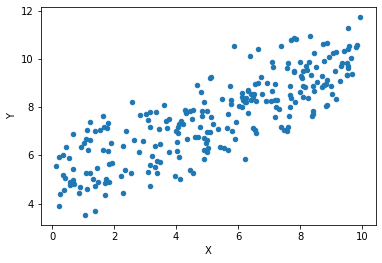

In [53]:
df.sample(n=250).plot(kind = 'scatter',x = 'X', y = 'Y')

In [54]:
batch_size = 8 # depend on your data

In [55]:
np.random.randn(2)

array([1.04461878, 0.59729029])

### Build regression Model: y = mx + b

#### 1. Create Variables

In [56]:
# Initialize slop and intercept
m = tf.Variable(1.04)
b = tf.Variable(0.59)

#### 2. Create placeholder

In [57]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

#### 3. Define graph - operation

In [58]:
y_model = m*xph+b

#### 4. Loss/Cost function

In [59]:
error = tf.reduce_sum(tf.square(yph-y_model))

#### 5. Create optimazer

In [60]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

#### 6. Initilize variables and run session

In [61]:
init = tf.global_variables_initializer()

In [67]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000 #each batch are data points
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(X),size=batch_size) #getting random index datapoints (batch size = 8, 8 points)
        
        feed = {xph:X[rand_ind],yph:y_true[rand_ind]} #feed dictionary: x data point and y label
        
        sess.run(train,feed_dict=feed) #running training optimizer
        
    model_m,model_b = sess.run([m,b])
        

In [68]:
model_m

0.42341983

In [69]:
model_b

4.8932867

In [70]:
y_hat = X+model_m + model_b

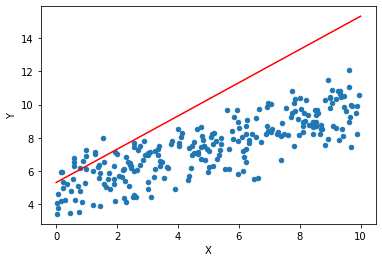

In [71]:
df.sample(n=250).plot(kind = 'scatter',x = 'X', y = 'Y')
plt.plot(X,y_hat, 'r')

### TF Estimator: Linear regression

In [72]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [73]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sampayo\\AppData\\Local\\Temp\\tmpwijiwa2x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025632523408>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train Test Split


In [74]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_eval, y_train, y_eval = train_test_split(X,y_true,test_size=0.3, random_state = 101)

In [78]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


#### Set up Estimator Inputs

In [79]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [80]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [81]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

#### Train the Estimator

In [82]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sampayo\AppData\Local\Temp\tmpwijiwa2x\model.ckpt.
INFO:tensorflow:loss = 206.52106, step = 1
INFO:tensorflow:global_step/sec: 1176.85
INFO:tensorflow:loss = 11.130844, step = 101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1899.87
INFO:tensorflow:loss = 20.204542, step = 201 (0.054 sec)
INFO:tensorflow:global_step/sec: 1887.39
INFO:tensorflow:loss = 5.077881, step = 301 (0.053 sec)
INFO:tensorflow:global_s

#### Evaluation

In [83]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-06T08:31:35Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpwijiwa2x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-05-06-08:31:36
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.118432, global_step = 1000, label/mean = 7.5317

In [84]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-06T08:31:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpwijiwa2x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-05-06-08:31:38
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1035088, global_step = 1000, label/mean = 7.490699, loss = 4.4140353, prediction/mean = 7.3744144
INFO:tensorflow:Saving 'checkpoint_p

In [85]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.118432, 'label/mean': 7.53173, 'loss': 4.473728, 'prediction/mean': 7.413954, 'global_step': 1000}
eval metrics: {'average_loss': 1.1035088, 'label/mean': 7.490699, 'loss': 4.4140353, 'prediction/mean': 7.3744144, 'global_step': 1000}


Eval is good if loss in train and eval are similar

#### Predictions

In [86]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [87]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpwijiwa2x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.368708], dtype=float32)},
 {'predictions': array([5.041403], dtype=float32)},
 {'predictions': array([5.7140975], dtype=float32)},
 {'predictions': array([6.386792], dtype=float32)},
 {'predictions': array([7.0594873], dtype=float32)},
 {'predictions': array([7.7321815], dtype=float32)},
 {'predictions': array([8.404877], dtype=float32)},
 {'predictions': array([9.077571], dtype=float32)},
 {'predictions': array([9.750266], dtype=float32)},
 {'predictions': array([10.42296], dtype=float32)}]

In [88]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpwijiwa2x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [89]:
predictions

[array([4.368708], dtype=float32),
 array([5.041403], dtype=float32),
 array([5.7140975], dtype=float32),
 array([6.386792], dtype=float32),
 array([7.0594873], dtype=float32),
 array([7.7321815], dtype=float32),
 array([8.404877], dtype=float32),
 array([9.077571], dtype=float32),
 array([9.750266], dtype=float32),
 array([10.42296], dtype=float32)]

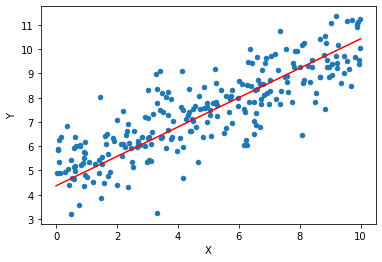

In [92]:
df.sample(n=250).plot(kind='scatter',x='X',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

### Tensorflow Classification

In [96]:
import pandas as pd

In [97]:
diabetes = pd.read_csv('E:\\Datasets\\pima-indians-diabetes.csv')

In [98]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


#### Normalizing data

In [101]:
#All columns minus label column Class, Group (strings) and Age
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [102]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)

In [103]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


#### Feature Columns

In [104]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

#### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [105]:
import tensorflow as tf

In [106]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

#### Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [107]:
#If i know possible groups:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# If not:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

#### Converting Continuous to Categorical

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

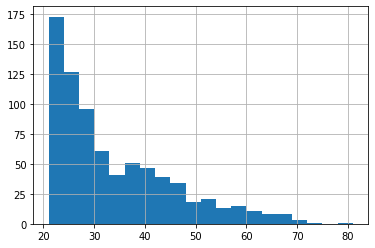

In [124]:
diabetes['Age'].hist(bins=20)

In [125]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [126]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

#### Train Test Split

In [127]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [128]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number_pregnant        768 non-null    float64
 1   Glucose_concentration  768 non-null    float64
 2   Blood_pressure         768 non-null    float64
 3   Triceps                768 non-null    float64
 4   Insulin                768 non-null    float64
 5   BMI                    768 non-null    float64
 6   Pedigree               768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
 9   Group                  768 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [129]:
x_data = diabetes.drop('Class',axis=1)

In [130]:
labels = diabetes['Class']

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

#### Input Function

In [133]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

#### Creating the Model

In [134]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sampayo\\AppData\\Local\\Temp\\tmpvspkim_v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025648A0E508>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [135]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sampayo\AppData\Local\Temp\tmpvspkim_v\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 321.485
INFO:tensorflow:loss = 4.306325, step = 101 (0.315 sec)
INFO:tensorflow:global_step/sec: 688.718
INFO:tensorflow:loss = 6.6033883, step = 201 (0.144 sec)
INFO:tensorflow:global_step/sec: 658.113
INFO:tensorflow:loss = 4.3244896, step = 301 (0.151 sec)
INFO:tensorflow:global_step/sec: 621.319
INFO:tensorflow:loss = 4.902402, step = 401 (0.162 sec)
INFO:tensorflow:global_step/sec: 609.955
INFO:tensorflow:loss = 4.697876, step = 501 (0.164 sec)
INFO:tensorflow:global_step/sec: 568.365
INFO:tensorflow:loss = 6.1443524, step 

In [136]:
# Useful link for your own data
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names

#### Evaluation

In [137]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [138]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-06T09:05:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpvspkim_v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-06-09:05:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7362205, accuracy_baseline = 0.65748036, auc = 0.7836052, auc_precision_recall = 0.62175596, average_loss = 0.53417104, global_step = 1000, label/mean = 0.34251967, loss = 5.21844, precision = 0.6851852, prediction/mean = 0.32659918, recall = 0.42528737
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Sampayo\AppData\Local\Temp\tmpvspkim_v\model.ckpt-1000


In [139]:
results

{'accuracy': 0.7362205,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7836052,
 'auc_precision_recall': 0.62175596,
 'average_loss': 0.53417104,
 'label/mean': 0.34251967,
 'loss': 5.21844,
 'precision': 0.6851852,
 'prediction/mean': 0.32659918,
 'recall': 0.42528737,
 'global_step': 1000}

#### Predictions

In [140]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [141]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [142]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpvspkim_v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.09804142], dtype=float32),
  'logistic': array([0.47550926], dtype=float32),
  'probabilities': array([0.5244908, 0.4755093], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.29635954], dtype=float32),
  'logistic': array([0.5735523], dtype=float32),
  'probabilities': array([0.42644766, 0.57355237], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.67969096], dtype=float32),
  'logistic': array([0.3363303], dtype=float32),
  'probabilities': array([0.6636697, 0.3363303], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.0208868], dtype=float32),
  'logistic': array([0.26485473], dtype=float32),
  'probabilities': array([0.73514533, 0.26485473], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': 

### DNN (Dense Neural Network) Classifier

In [143]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)
#hidden units: neuronsxlayer

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sampayo\\AppData\\Local\\Temp\\tmp2vhwligm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025648CA9E48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### To solve categorical column

In [145]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [146]:
#replace assigned_group with embedded_group_column
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

#### Input function

In [148]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

#### Model

In [149]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sampayo\\AppData\\Local\\Temp\\tmpd58d2ag2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002564B5C8088>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [150]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sampayo\AppData\Local\Temp\tmpd58d2ag2\model.ckpt.
INFO:tensorflow:loss = 6.952674, step = 1
INFO:tensorflow:global_step/sec: 347.313
INFO:tensorflow:loss = 5.8694963, step = 101 (0.289 sec)
INFO:tensorflow:global_step/sec: 697.378
INFO:tensorflow:loss = 4.2003827, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.895
INFO:tensorflow:loss = 3.5298188, step = 301 (0.148 sec)
INFO:tensorflow:global_step/sec: 641.234
INFO:tensorflow:loss = 6.781894, step = 401 (0.153 sec)
INFO:tensorflow:global_step/sec: 714.519
INFO:tensor

In [151]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [152]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-06T09:11:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sampayo\AppData\Local\Temp\tmpd58d2ag2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-06-09:11:21
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7598425, accuracy_baseline = 0.65748036, auc = 0.8302016, auc_precision_recall = 0.71273315, average_loss = 0.4995279, global_step = 1000, label/mean = 0.34251967, loss = 4.8800035, precision = 0.6203704, prediction/mean = 0.4275225, recall = 0.77011496
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Sampayo\AppData\Local\Temp\tmpd58d2ag2\model.ckpt-1000


{'accuracy': 0.7598425,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8302016,
 'auc_precision_recall': 0.71273315,
 'average_loss': 0.4995279,
 'label/mean': 0.34251967,
 'loss': 4.8800035,
 'precision': 0.6203704,
 'prediction/mean': 0.4275225,
 'recall': 0.77011496,
 'global_step': 1000}

In [154]:
#LinearClassifier results
results

{'accuracy': 0.7362205,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7836052,
 'auc_precision_recall': 0.62175596,
 'average_loss': 0.53417104,
 'label/mean': 0.34251967,
 'loss': 5.21844,
 'precision': 0.6851852,
 'prediction/mean': 0.32659918,
 'recall': 0.42528737,
 'global_step': 1000}